# Exercise 1.5 Text Mining

## 01. Imports/Libraries

In [123]:
from textblob import TextBlob 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chase\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Chase\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Chase\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Chase\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Chase\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [124]:
# Pathway
File_Pathway = r"C:\Users\Chase\20th-century\Data Visualizations with Python\Achievement 1\02_Data\Original_Data"

In [125]:
# 20th century Web Scrape Text Document
df_20th_cent = File_Pathway + r"\20th_century_events_web_scraped.txt"

## 02. Tokenization

In [126]:
# Load the text
with open(df_20th_cent, "r", encoding="utf-8") as file:
    data = file.read().replace('\n', '')

In [127]:
# Sentence tokenization
from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent)

['Key events of the 20th century - WikipediaJump to contentMain menuMain menumove to sidebarhide\t\tNavigation\tMain pageContentsCurrent eventsRandom articleAbout WikipediaContact us\t\tContribute\tHelpLearn to editCommunity portalRecent changesUpload fileSpecial pagesSearchSearchAppearanceDonateCreate accountLog inPersonal toolsDonate Create account Log inContentsmove to sidebarhide(Top)1Historic events in the 20th centuryToggle Historic events in the 20th century subsection1.1World at the beginning of the century1.1.1"The war to end all wars": World War I (1914–1918)1.2Spanish flu1.2.1Russian Revolution and communism1.3Between the wars1.3.1Economic depression1.3.2The rise of dictatorship1.4Global war: World War II (1939–1945)1.4.1The war in Europe1.4.2Blitzkrieg1.4.3Operation Barbarossa1.4.4Turning tides1.4.5Operation Overlord1.4.6Final days1.4.7The war in the Pacific1.4.7.1Background1.4.8Japanese Expansion1.4.9Allied offensive1.4.10Final days1.4.11The Holocaust1.4.12The Nuclear Age 

In [128]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word)

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'WikipediaJump', 'to', 'contentMain', 'menuMain', 'menumove', 'to', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSpecial', 'pagesSearchSearchAppearanceDonateCreate', 'accountLog', 'inPersonal', 'toolsDonate', 'Create', 'account', 'Log', 'inContentsmove', 'to', 'sidebarhide', '(', 'Top', ')', '1Historic', 'events', 'in', 'the', '20th', 'centuryToggle', 'Historic', 'events', 'in', 'the', '20th', 'century', 'subsection1.1World', 'at', 'the', 'beginning', 'of', 'the', 'century1.1.1', "''", 'The', 'war', 'to', 'end', 'all', 'wars', "''", ':', 'World', 'War', 'I', '(', '1914–1918', ')', '1.2Spanish', 'flu1.2.1Russian', 'Revolution', 'and', 'communism1.3Between', 'the', 'wars1.3.1Economic', 'depression1.3.2The', 'rise', 'of', 'dictatorship1.4Global', 'war', ':', 'World', 'War', 'I

In [129]:
# Create frequency distribution

from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 4921 samples and 21501 outcomes>


In [130]:
dist_words.most_common(10)

[('.', 1314),
 ('the', 1136),
 (',', 983),
 ('of', 628),
 ('and', 413),
 ('to', 334),
 ('in', 310),
 ('[', 309),
 (']', 309),
 ('The', 303)]

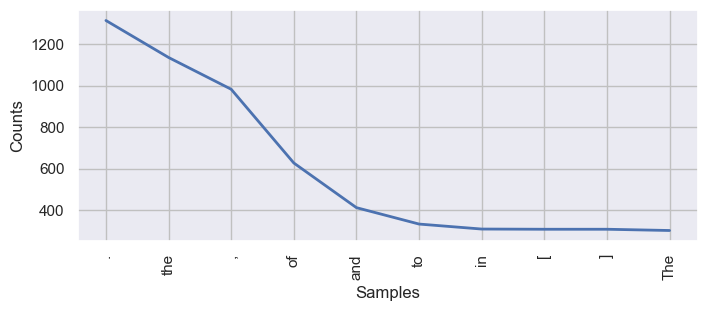

In [131]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words.plot(10,cumulative = False)
plt.show()

## 03. Stopwords

In [132]:
# Defining stopwords

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'under', 'is', 'they', 'mightn', "needn't", 'this', 'all', 'him', "he's", "aren't", 'once', 'ain', "won't", "he'd", "i'll", "you've", 'as', "they've", "don't", 'some', 'if', 'or', 'it', 'out', 'any', 'ourselves', 'through', 'after', 'so', "hasn't", 'yours', 'both', 'ma', 'very', 'because', 'but', 'before', 'then', 've', "she's", 'each', 'an', "he'll", 'with', "that'll", 'against', 'while', "hadn't", 're', 't', 'not', 'should', "weren't", 'm', 'other', 'over', 's', 'below', "it'd", 'own', 'which', "mustn't", "mightn't", 'her', 'there', 'me', 'was', 'were', "should've", 'at', "they'd", 'doesn', 'isn', 'most', 'been', 'ours', 'd', 'hers', 'yourselves', 'have', 'himself', 'mustn', 'again', 'few', "we'll", 'when', 'hadn', "you'll", 'o', 'why', 'from', 'didn', 'here', 'just', 'these', 'does', "shan't", 'being', 'by', 'for', 'won', 'what', "they'll", 'your', 'into', 'off', 'the', 'on', "isn't", 'are', 'until', 'theirs', 'she', 'whom', "i'm", "i'd", 'only', "you're", 'above', 'no', 'and', 'y'

In [133]:
# Removing stopwords in words

filtered_words = [] # creates an empty list
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [134]:
filtered_words

['Key',
 'events',
 '20th',
 'century',
 '-',
 'WikipediaJump',
 'contentMain',
 'menuMain',
 'menumove',
 'sidebarhide',
 'Navigation',
 'Main',
 'pageContentsCurrent',
 'eventsRandom',
 'articleAbout',
 'WikipediaContact',
 'us',
 'Contribute',
 'HelpLearn',
 'editCommunity',
 'portalRecent',
 'changesUpload',
 'fileSpecial',
 'pagesSearchSearchAppearanceDonateCreate',
 'accountLog',
 'inPersonal',
 'toolsDonate',
 'Create',
 'account',
 'Log',
 'inContentsmove',
 'sidebarhide',
 '(',
 'Top',
 ')',
 '1Historic',
 'events',
 '20th',
 'centuryToggle',
 'Historic',
 'events',
 '20th',
 'century',
 'subsection1.1World',
 'beginning',
 'century1.1.1',
 "''",
 'The',
 'war',
 'end',
 'wars',
 "''",
 ':',
 'World',
 'War',
 'I',
 '(',
 '1914–1918',
 ')',
 '1.2Spanish',
 'flu1.2.1Russian',
 'Revolution',
 'communism1.3Between',
 'wars1.3.1Economic',
 'depression1.3.2The',
 'rise',
 'dictatorship1.4Global',
 'war',
 ':',
 'World',
 'War',
 'II',
 '(',
 '1939–1945',
 ')',
 '1.4.1The',
 'war',


In [135]:
# Create a new FreqDist for filtered_words

dist_words_filter = FreqDist(filtered_words)
print(dist_words_filter)

<FreqDist with 4817 samples and 16691 outcomes>


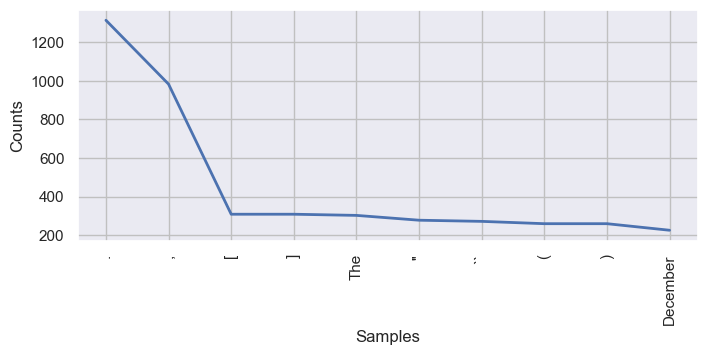

In [136]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter.plot(10, cumulative = False)
plt.show()

In [137]:
dist_words_filter

FreqDist({'.': 1314, ',': 983, '[': 309, ']': 309, 'The': 303, "''": 278, '``': 272, '(': 260, ')': 260, 'December': 226, ...})

In [138]:
# Substitute all punctuations marks with a space 

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(filtered_words))

In [139]:
sans_punc

'  Key    events      th    century         WikipediaJump    contentMain    menuMain    menumove    sidebarhide    Navigation    Main    pageContentsCurrent    eventsRandom    articleAbout    WikipediaContact    us    Contribute    HelpLearn    editCommunity    portalRecent    changesUpload    fileSpecial    pagesSearchSearchAppearanceDonateCreate    accountLog    inPersonal    toolsDonate    Create    account    Log    inContentsmove    sidebarhide         Top          Historic    events      th    centuryToggle    Historic    events      th    century    subsection   World    beginning    century               The    war    end    wars               World    War    I                              Spanish    flu     Russian    Revolution    communism   Between    wars     Economic    depression     The    rise    dictatorship   Global    war         World    War    II                                The    war    Europe     Blitzkrieg     Operation    Barbarossa     Turning    tides    

In [140]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)
print(tokenized_word_2)

['Key', 'events', 'th', 'century', 'WikipediaJump', 'contentMain', 'menuMain', 'menumove', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSpecial', 'pagesSearchSearchAppearanceDonateCreate', 'accountLog', 'inPersonal', 'toolsDonate', 'Create', 'account', 'Log', 'inContentsmove', 'sidebarhide', 'Top', 'Historic', 'events', 'th', 'centuryToggle', 'Historic', 'events', 'th', 'century', 'subsection', 'World', 'beginning', 'century', 'The', 'war', 'end', 'wars', 'World', 'War', 'I', 'Spanish', 'flu', 'Russian', 'Revolution', 'communism', 'Between', 'wars', 'Economic', 'depression', 'The', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'The', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'The', 'war', 'Pacific', 'Background', 'Japanese', 'Expansion', 'A

In [141]:
# Create a new FreqDist

dist_words_filter_2 = FreqDist(tokenized_word_2)

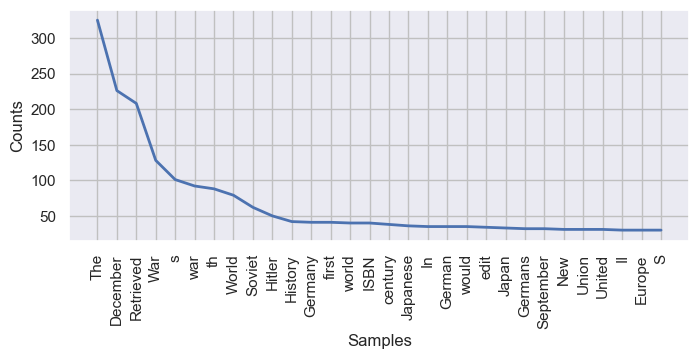

In [142]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter_2.plot(30, cumulative = False)
plt.show()

In [143]:
dist_words_filter_2.most_common(20)

[('The', 325),
 ('December', 226),
 ('Retrieved', 208),
 ('War', 128),
 ('s', 101),
 ('war', 92),
 ('th', 88),
 ('World', 79),
 ('Soviet', 62),
 ('Hitler', 50),
 ('History', 42),
 ('Germany', 41),
 ('first', 41),
 ('world', 40),
 ('ISBN', 40),
 ('century', 38),
 ('Japanese', 36),
 ('In', 35),
 ('German', 35),
 ('would', 35)]

#### Change between the Charts
The dist_words_filter_2 frequency distribution chart changed from showing punctuation and filler words to showing meaningful words once both stopwords and punctuation were removed. Yet there are still some words and letters that could be removed.

## 04. POS Tags with TextBlob

In [144]:
# Extra stopwords
extra_stopwords = {"and","then","n","t","s","the"}

# Suffix noise
suffix_noise = {"st","nd","rd","th","ad","ce","bc"}

# Combine into one set
new_stopwords = extra_stopwords.union(suffix_noise)

def clean_tokens(tokens):
    cleaned = []
    for tok in tokens:
        t = tok.lower().strip()        # normalize
        t = re.sub(r'[^a-z]', '', t)   # remove non-letters
        if not t:                      # skip empty results
            continue
        if t in new_stopwords:         # drop stopwords + suffix noise
            continue
        if len(t) <= 2:                # drop very short fragments
            continue
        cleaned.append(t)
    return cleaned

In [145]:
# Filtering stopwords
filtered = []
for word in tokenized_word_2:
    if word not in new_stopwords:
        filtered.append(word)

In [146]:
%%time
text = TextBlob(str(filtered))

# Creating a textblob object

CPU times: total: 0 ns
Wall time: 5.07 ms


In [147]:
# Work check
text

TextBlob("['Key', 'events', 'century', 'WikipediaJump', 'contentMain', 'menuMain', 'menumove', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSpecial', 'pagesSearchSearchAppearanceDonateCreate', 'accountLog', 'inPersonal', 'toolsDonate', 'Create', 'account', 'Log', 'inContentsmove', 'sidebarhide', 'Top', 'Historic', 'events', 'centuryToggle', 'Historic', 'events', 'century', 'subsection', 'World', 'beginning', 'century', 'The', 'war', 'end', 'wars', 'World', 'War', 'I', 'Spanish', 'flu', 'Russian', 'Revolution', 'communism', 'Between', 'wars', 'Economic', 'depression', 'The', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'The', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'The', 'war', 'Pacific', 'Background', 'Japanese', 'Expansion', 'Allied', 

In [148]:
# Extracting part-of-speech (POS) tags
tags_list = text.tags

In [149]:
tags_list

[('[', 'JJ'),
 ("'Key", 'NNP'),
 ("'", 'POS'),
 ("'events", 'NNS'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'WikipediaJump", 'NNP'),
 ("'", 'POS'),
 ("'menumove", 'NNP'),
 ("'", 'POS'),
 ("'sidebarhide", 'NNP'),
 ("'", 'POS'),
 ("'Navigation", 'NN'),
 ("'pageContentsCurrent", 'NNP'),
 ("'", 'POS'),
 ("'eventsRandom", 'NNP'),
 ("'", 'POS'),
 ("'articleAbout", 'IN'),
 ("'WikipediaContact", 'NNP'),
 ("'", 'POS'),
 ("'us", 'NNP'),
 ("'", 'POS'),
 ("'HelpLearn", 'NNP'),
 ("'", 'POS'),
 ("'editCommunity", 'NNP'),
 ("'", 'POS'),
 ("'portalRecent", 'NNP'),
 ("'", 'POS'),
 ("'fileSpecial", 'NNP'),
 ("'", 'POS'),
 ("'pagesSearchSearchAppearanceDonateCreate", 'NNP'),
 ("'", 'POS'),
 ("'accountLog", 'NNP'),
 ("'", 'POS'),
 ("'inPersonal", 'NNP'),
 ("'", 'POS'),
 ("'toolsDonate", 'NNP'),
 ("'", 'POS'),
 ("'Create", 'NNP'),
 ("'", 'POS'),
 ("'account", 'NNP'),
 ("'", 'POS'),
 ("'Log", 'NNP'),
 ("'", 'POS'),
 ("'inContentsmove", 'NNP'),
 ("'", 'POS'),
 ("'sidebarhide", 'NNP'),
 ("'", '

In [150]:
# Create dataframe
df_text = pd.DataFrame(tags_list)
df_text.columns = ['Words', "Word type"]

In [151]:
df_text.head()

,Words,Word type
0,[,JJ
1,'Key,NNP
2,',POS
3,'events,NNS
4,',POS


In [152]:
# Grouping and counting word types
df_t = df_text.groupby('Word type').count().reset_index()

In [153]:
df_t.head()

,Word type,Words
0,CC,1
1,CD,78
2,DT,13
3,EX,13
4,FW,43


In [154]:
# Top 20 words
top20 = df_t.nlargest(20, 'Words')

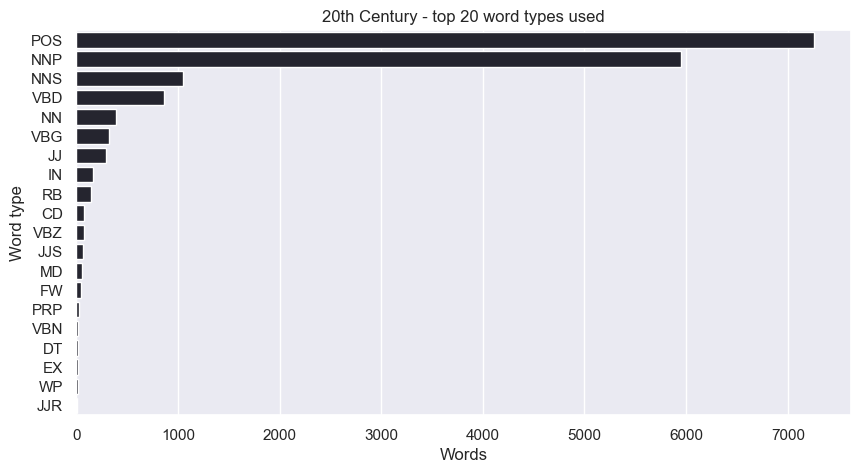

In [155]:
# Plot top 20 word types

plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 20):
    sns.barplot(x = "Words", y = "Word type",
    saturation = 0.9, data = top20).set_title("20th Century - top 20 word types used")

## 05. POS labels

#### Nouns

In [156]:
df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNP")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15 = y.nlargest(15, 'Occurences')

In [157]:
top15

,Word,Occurences
1204,'The,325
298,'December,226
1299,'War,128
2657,'war,92
1349,'World,79
1144,'Soviet,62
554,'Hitler,50
553,'History,42
1834,'first,41
580,'ISBN,40


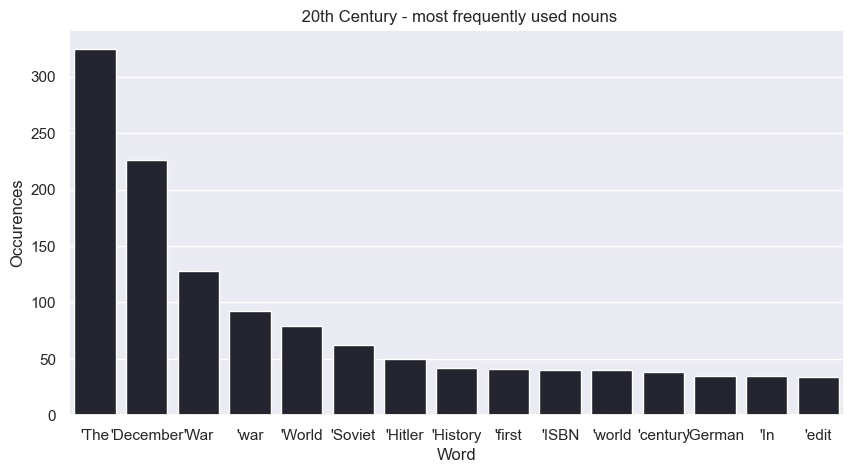

In [158]:
# Plot top 10
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data = top15).set_title(" 20th Century - most frequently used nouns")

#### Verbs

In [159]:
df = df_text[(df_text['Word type'] == "VB")  | (df_text['Word type'] == "VBD")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top10 = y.nlargest(10, 'Occurences')

In [160]:
top10

,Word,Occurences
28,'Retrieved,208
37,'United,31
0,'Allied,19
198,'led,15
1,'Archived,14
324,'used,13
196,'launched,12
93,'controlled,9
160,'forced,8
307,'surrendered,7


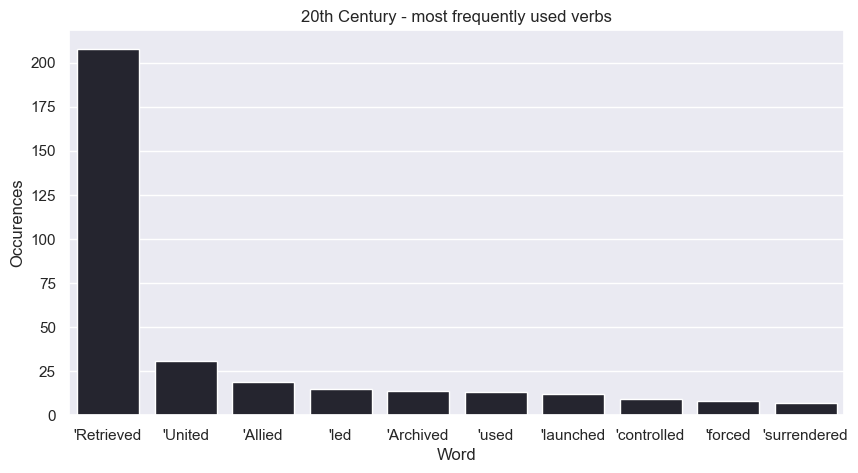

In [161]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x = "Word", y = "Occurences",
    saturation = 0.9, data = top10).set_title("20th Century - most frequently used verbs")

#### Adjectives

In [162]:
df = df_text[df_text['Word type'] == "JJ"]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by=['Occurences'], ascending=False)
top10 = y.nlargest(10, 'Occurences')

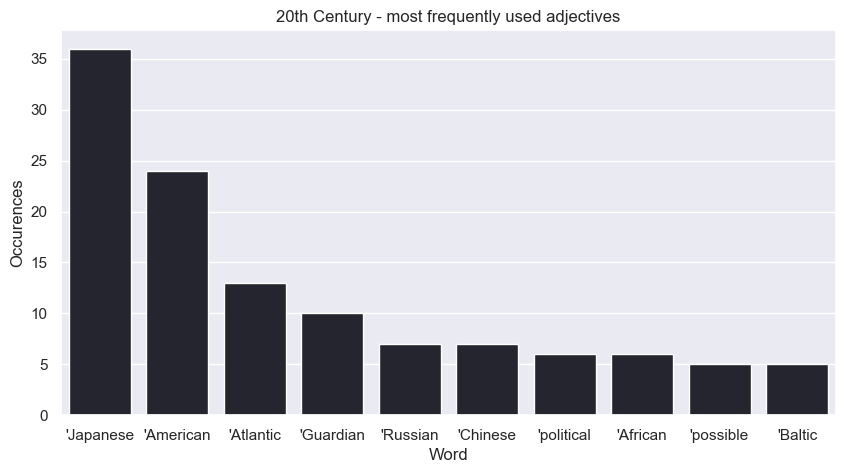

In [163]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data=top10).set_title("20th Century - most frequently used adjectives")

The results from the POVs is war based around the world wars that occured.

## 06. Counting Country Occurences

In [164]:
# Import country list
countries = pd.read_csv(
    r"C:\Users\Chase\20th-century\Data Visualizations with Python\Achievement 1\02_Data\Original_Data\countries_list_20th_century_1.5.csv",
    header=None,
    dtype=str,
    skiprows=1,                  # skip the header row that's in row 0
    names=["id", "country_name"] # set proper column names
)

print(countries.head())
print(countries.shape)

  id   country_name
0  1   Afghanistan 
1  2       Albania 
2  3       Algeria 
3  4       Andorra 
4  5        Angola 
(209, 2)


In [165]:
# Clean country names (strip spaces, lowercase)
countries["country_name"] = countries["country_name"].str.strip().str.lower()

In [166]:
country_list = countries["country_name"].tolist()

In [167]:
# Flatten tokens into a string
listToStr = ' '.join([str(elem) for elem in filtered])
 
print(listToStr)

Key events century WikipediaJump contentMain menuMain menumove sidebarhide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us Contribute HelpLearn editCommunity portalRecent changesUpload fileSpecial pagesSearchSearchAppearanceDonateCreate accountLog inPersonal toolsDonate Create account Log inContentsmove sidebarhide Top Historic events centuryToggle Historic events century subsection World beginning century The war end wars World War I Spanish flu Russian Revolution communism Between wars Economic depression The rise dictatorship Global war World War II The war Europe Blitzkrieg Operation Barbarossa Turning tides Operation Overlord Final days The war Pacific Background Japanese Expansion Allied offensive Final days The Holocaust The Nuclear Age begins The post war world The end empires decolonization The Cold War War proxy The space race The end Cold War Information communications technology The world end century See also References Sources External lin

In [168]:
# Create a count for all countries
all_counts = Counter(re.sub(r'\W+', ' ', listToStr).lower().split())

In [169]:
all_counts

Counter({'the': 326,
         'december': 226,
         'war': 221,
         'retrieved': 208,
         'world': 119,
         'history': 77,
         'soviet': 63,
         'new': 54,
         'first': 54,
         'hitler': 50,
         'century': 43,
         'germany': 41,
         'nuclear': 40,
         'isbn': 40,
         'battle': 39,
         'would': 38,
         'japanese': 36,
         'in': 36,
         'edit': 35,
         'german': 35,
         'states': 35,
         'japan': 33,
         'end': 32,
         'germans': 32,
         'union': 32,
         'september': 32,
         'united': 31,
         'ii': 30,
         'europe': 30,
         's': 30,
         'issn': 30,
         'space': 29,
         'also': 29,
         'became': 29,
         'august': 29,
         'july': 28,
         'weapons': 28,
         'nations': 26,
         'u': 26,
         'a': 26,
         'many': 25,
         'june': 25,
         'com': 25,
         'american': 24,
         'army': 24,
 

In [170]:
print(country_list[:10])
print(countries.shape)


['afghanistan', 'albania', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'australia', 'austria']
(209, 2)


In [171]:
# Count mentions of each country
dict_of_counts = {c: all_counts[c] for c in country_list if c in all_counts}


In [173]:
# Convert dict_of_counts into a DataFrame for plotting

df = pd.DataFrame(list(dict_of_counts.items()), columns=["Country","Times mentioned"])
df = df.sort_values("Times mentioned", ascending=False)
print(df.head())


    Country  Times mentioned
18  germany               41
29    japan               33
17   france               17
28    italy               14
56  vietnam               14


C:\Users\Chase\AppData\Local\Temp\ipykernel_31616\1953430149.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Times mentioned", y="Country",


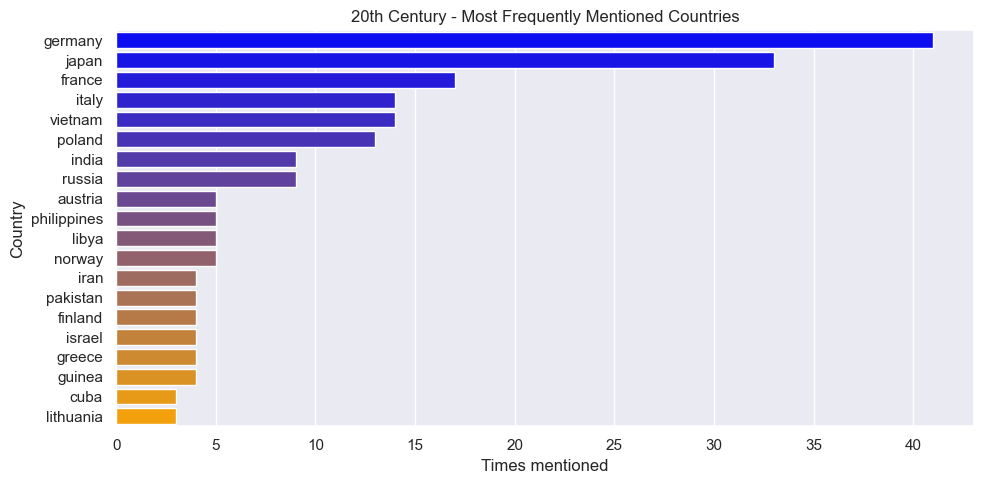

In [174]:
# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x="Times mentioned", y="Country",
            data=df.head(20), palette="blend:blue,orange", saturation=0.9)\
    .set_title("20th Century - Most Frequently Mentioned Countries")
plt.tight_layout()
plt.show()

Looking at the chart, it seems the countries frequently mentioned were involved in the Wars that shaped history and their nations at one point.

## Sentiment Analysis

In [175]:
text_sent = TextBlob(str(filtered))

In [176]:
print(text_sent.sentiment)

Sentiment(polarity=0.04891788308110616, subjectivity=0.355540881295013)
